In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import vstack, csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Paths to the datasets
bulgarian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/bul_news_2019_100K/bul_news_2019_100K-sentences.txt'
czech_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/ces_news_2019_100K/ces_news_2019_100K-sentences.txt'
danish_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/dan_news_2019_100K/dan_news_2019_100K-sentences.txt'
slovak_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/slk_news_2020_100K/slk_news_2020_100K-sentences.txt'
romanian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/ron_news_2019_100K/ron_news_2019_100K-sentences.txt'
polish_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/pol_news_2019_100K/pol_news_2019_100K-sentences.txt'
dutch_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/nld_news_2019_100K/nld_news_2019_100K-sentences.txt'
lithuanian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/lit_news_2019_100K/lit_news_2019_100K-sentences.txt'
latvian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/lav_news_2019_100K/lav_news_2019_100K-sentences.txt'
italian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/ita_news_2019_100K/ita_news_2019_100K-sentences.txt'
hungarian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/hun_news_2019_100K/hun_news_2019_100K-sentences.txt'
french_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/fra_news_2019_100K/fra_news_2019_100K-sentences.txt'
finnish_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/fin_news_2019_100K/fin_news_2019_100K-sentences.txt'
estonian_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/est_news_2019_100K/est_news_2019_100K-sentences.txt'
english_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/eng_news_2019_100K/eng_news_2019_100K-sentences.txt'
german_sentences_file = 'drive/MyDrive/Colab Notebooks/languages_data/deu_news_2019_100K/deu_news_2019_100K-sentences.txt'

# Load data into DataFrames
bulgarian_df = pd.read_csv(bulgarian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
czech_df = pd.read_csv(czech_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
danish_df = pd.read_csv(danish_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
slovak_df = pd.read_csv(slovak_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
romanian_df = pd.read_csv(romanian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
polish_df = pd.read_csv(polish_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
dutch_df = pd.read_csv(dutch_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
latvian_df = pd.read_csv(latvian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
italian_df = pd.read_csv(italian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
hungarian_df = pd.read_csv(hungarian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
french_df = pd.read_csv(french_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
finnish_df = pd.read_csv(finnish_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
estonian_df = pd.read_csv(estonian_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
english_df = pd.read_csv(english_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])
german_df = pd.read_csv(german_sentences_file, sep='\t', header=None, names=['Sentence_ID', 'Sentence'])

# Add language labels
bulgarian_df['Language'] = 'Bulgarian'
czech_df['Language'] = 'Czech'
danish_df['Language'] = 'Danish'
slovak_df['Language'] = 'Slovak'
romanian_df['Language'] = 'Romanian'
polish_df['Language'] = 'Polish'
dutch_df['Language'] = 'Dutch'
latvian_df['Language'] = 'Latvian'
italian_df['Language'] = 'Italian'
hungarian_df['Language'] = 'Hungarian'
french_df['Language'] = 'French'
finnish_df['Language'] = 'Finnish'
estonian_df['Language'] = 'Estonian'
english_df['Language'] = 'English'
german_df['Language'] = 'German'

# Combine the data
df = pd.concat([
    bulgarian_df, czech_df, danish_df, slovak_df, romanian_df, polish_df,
    dutch_df, latvian_df, italian_df, hungarian_df, french_df, finnish_df,
    estonian_df, english_df, german_df
], ignore_index=True)

In [14]:
# Display one sample sentence from each language
sample_sentences = df.groupby('Language').apply(lambda x: x.sample(1)).reset_index(drop=True)
sample_sentences = sample_sentences[['Sentence', 'Language']]
print(sample_sentences)

# N-gram vectorization
def create_ngram_vector(sentence, n=3, d=10000):
    ngrams = [sentence[i:i+n] for i in range(len(str(sentence))-n+1)]
    row = []
    col = []
    data = []
    for ngram in ngrams:
        hash_val = sum(ord(c) for c in ngram) % d
        row.append(0)
        col.append(hash_val)
        data.append(1)
    sparse_vector = csr_matrix((data, (row, col)), shape=(1, d))  # Using csr_matrix from scipy.sparse
    return sparse_vector

                                             Sentence   Language
0   Дали имат ресурса и уменията да се простират т...  Bulgarian
1   Bílý kožich ledních medvědů jim ve sněhu slouž...      Czech
2   Men selvom det går fremad, så ved han godt, at...     Danish
3   Ruim een jaar later laten de boeren in ruime m...      Dutch
4                             That also tends to lag.    English
5   Viru maakohtus algas protsess meeste üle, keda...   Estonian
6   Vaikka Jeesus ilmestyi monille, uskominen ei o...    Finnish
7                     C'est une victoire de l'équipe.     French
8   Sie begründen ihren Gerichtsantrag vom Freitag...     German
9   A családom eléggé népes, összesen 15-en vagyun...  Hungarian
10  Così quanto appreso dall’Ansa da fonti del min...    Italian
11  Pilnībā̄ finansiāli brīvi ar savā rīcībā̄ eso...    Latvian
12     Porozmawiaj z Gretą i pokaż, że nie jest sama.     Polish
13  Al doilea tronson va adãposti o salã de clasã ...   Romanian
14  Rušňovodič vlaku už p

In [15]:
# Create feature matrix using N-gram vectorization
X = vstack(df['Sentence'].apply(lambda x: create_ngram_vector(x, n=3, d=10000)))


In [16]:
# Encode the language labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Language'])

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train the model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [19]:
# Predict on the test set
y_pred_encoded = model.predict(X_test)

In [20]:
# Round predictions and ensure they fall within valid label range
y_pred_encoded_rounded = np.clip(np.round(y_pred_encoded), 0, len(label_encoder.classes_) - 1)

# Convert predictions back to string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded_rounded.astype(int))

Confusion Matrix:
 [[ 5040  2034  2545  2778  2624  1629   580   132    83    32    22     8
     10     5    31]
 [  115    11    30   114   364  1259  4198  6968  2481   437    60    16
      8     2     3]
 [   42     4     1     2    73  1191  8284  7291   431    22     1     2
      1     0     1]
 [   23     0     4    12    96  1107  7861  8409   329    32     5     1
      3     1     7]
 [   62     5    12    23   138  1004  6155  8689  1186   132    30     8
      7     2     6]
 [   82    29    30    60    91   526  4566  9216  1312   157    18     6
      1     4     0]
 [    3     1     2     2    21   108  2630 13204  2893   184    19     8
      6     4     1]
 [   11     6     5    11    23   168  2572 10918  3743   466    64    17
      0     6    15]
 [    1     0     3     2     2    42  1911 11792  4316   551    78    13
     11    11    17]
 [    6     2     4     4     9    67  1663  8740  5692  1227   207    39
     14     5    25]
 [    4     2     2     6     7

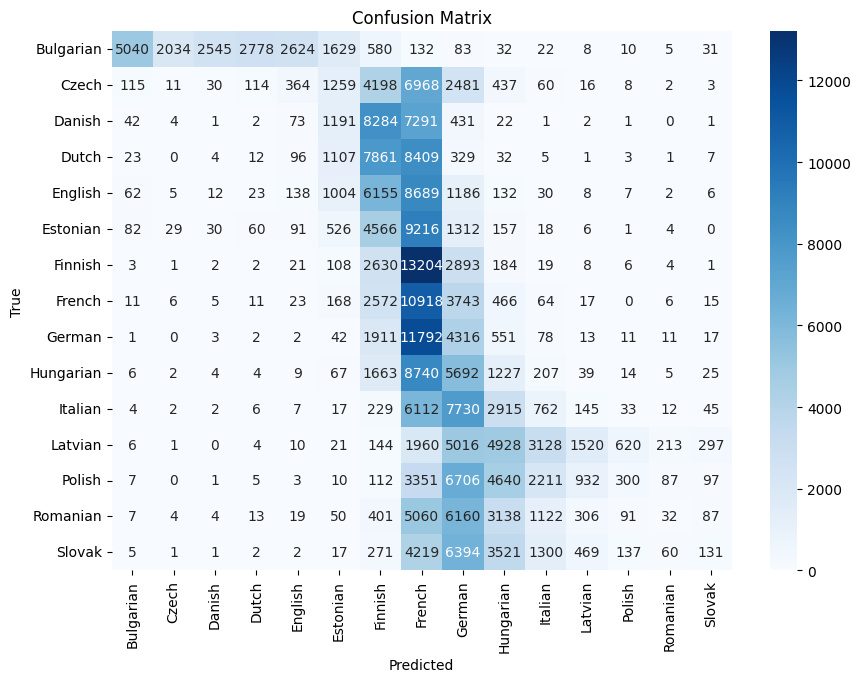

Accuracy: 10.47%
F1 Score: 0.08


In [21]:
# Convert y_test back to string labels
y_test_str = label_encoder.inverse_transform(y_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test_str, y_pred, labels=label_encoder.classes_)
acc = accuracy_score(y_test_str, y_pred)
f1 = f1_score(y_test_str, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", acc)
print("F1 Score:", f1)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy and F1 score
print(f"Accuracy: {acc * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")
